In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

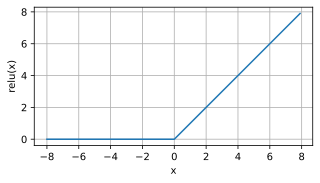

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

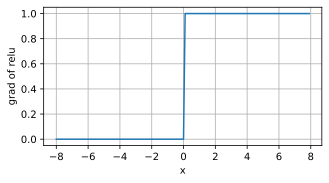

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

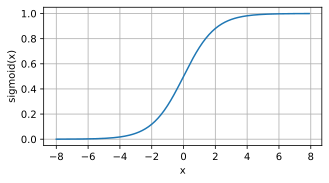

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

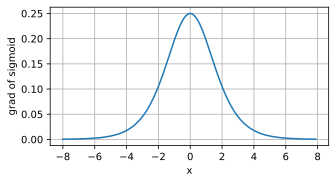

In [5]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

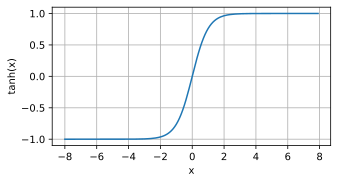

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

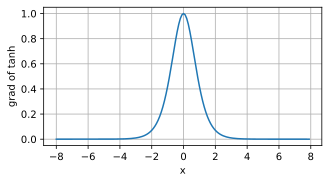

In [7]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [9]:
def relu(X):
    a = torch.zeros_like(X)+1
    return torch.max(X, a)

In [10]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs)) #将输入数据 X 重新塑形为一个二维张量，第一维：-1 是通配符，表示 自动计算该维度的大小
    #print(X.shape), print(self.W1.shape)
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

'146.40 sec'

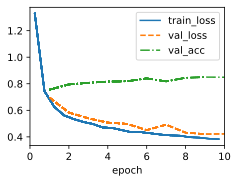

In [11]:
import time
tic = time.time()
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
f'{time.time() - tic:.2f} sec'

In [12]:
model.W1.shape, model.W2.shape

(torch.Size([784, 256]), torch.Size([256, 10]))

In [13]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        #在PyTorch中，nn.Flatten()是一个层，它的功能是将输入的多维张量展平为一维或二维张量。这在机器学习模型中非常有用，
        #特别是在将数据输入到全连接（也称为密集）层之前。
        #具体来说，nn.Flatten()会将一个形状为(batch_size, C, H, W)的四维张量（例如，由卷积神经网络的卷积层输出的张量）
        #展平为形状为(batch_size, C * H * W)的二维张量。如果你的输入数据本来就是二维的，比如(batch_size, features)，
        #那么nn.Flatten()会将其展平为(batch_size, features)，即保持不变。
        self.net = nn.Sequential(nn.Flatten(), 
                                 nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), 
                                 nn.LazyLinear(num_outputs))

'146.79 sec'

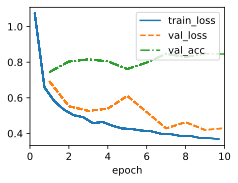

In [14]:
tic = time.time()								 
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)
f'{time.time() - tic:.2f} sec'

In [15]:
class MLP_2Hidden(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), 
                                 nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), 
                                 nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), 
                                 nn.LazyLinear(num_outputs))

'149.77 sec'

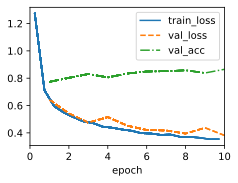

In [16]:
tic = time.time()								 
model2 = MLP_2Hidden(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model2, data)
f'{time.time() - tic:.2f} sec'

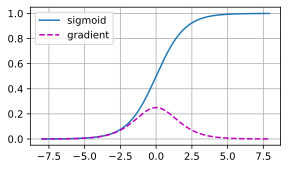

In [17]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))


In [18]:
M = torch.normal(0, 1, size=(4, 4))
print('a single matrix \n',M)
for i in range(100):
    M = M @ torch.normal(0, 1, size=(4, 4))
print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[-1.0152,  0.7931, -0.5606, -1.7827],
        [-1.7546,  0.5957,  0.4063, -1.2940],
        [-0.8305,  1.0275, -0.1955, -1.8099],
        [-0.0199, -0.2941,  0.4748, -0.5810]])
after multiplying 100 matrices
 tensor([[-4.2839e+26,  1.5477e+26,  7.7633e+26,  2.2238e+27],
        [-1.0483e+26,  3.7868e+25,  1.8996e+26,  5.4415e+26],
        [-2.1414e+26,  7.7362e+25,  3.8807e+26,  1.1116e+27],
        [ 1.6630e+26, -6.0080e+25, -3.0137e+26, -8.6324e+26]])


In [19]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    #print(mask)
    return mask * X / (1.0 - dropout)
	

In [64]:
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
dropout_p = 0.5: tensor([[ 0.,  2.,  4.,  6.,  8., 10., 12.,  0.],
        [16., 18.,  0.,  0., 24., 26., 28.,  0.]])
dropout_p = 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [21]:
X.mean(1), dropout_layer(X, 0.5).mean(1)

(tensor([ 3.5000, 11.5000]), tensor([ 4.5000, 12.0000]))

In [22]:
class DropoutMLPScratch(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = nn.LazyLinear(num_hiddens_1)
        self.lin2 = nn.LazyLinear(num_hiddens_2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((X.shape[0], -1))))
        if self.training:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)

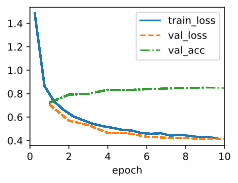

In [23]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [24]:
model

DropoutMLPScratch(
  (lin1): Linear(in_features=784, out_features=256, bias=True)
  (lin2): Linear(in_features=256, out_features=256, bias=True)
  (lin3): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
)

In [63]:
#Concise Implementation
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), 
            nn.LazyLinear(num_hiddens_1), 
            nn.ReLU(),
            nn.Dropout(dropout_1), 
            nn.LazyLinear(num_hiddens_2), 
            nn.ReLU(),
            nn.Dropout(dropout_2), 
            nn.LazyLinear(num_outputs))

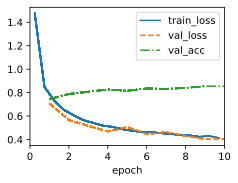

In [26]:
model = DropoutMLP(**hparams)
trainer.fit(model, data)

In [27]:
model

DropoutMLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [28]:
print(dir(nn))

['AdaptiveAvgPool1d', 'AdaptiveAvgPool2d', 'AdaptiveAvgPool3d', 'AdaptiveLogSoftmaxWithLoss', 'AdaptiveMaxPool1d', 'AdaptiveMaxPool2d', 'AdaptiveMaxPool3d', 'AlphaDropout', 'AvgPool1d', 'AvgPool2d', 'AvgPool3d', 'BCELoss', 'BCEWithLogitsLoss', 'BatchNorm1d', 'BatchNorm2d', 'BatchNorm3d', 'Bilinear', 'CELU', 'CTCLoss', 'ChannelShuffle', 'ConstantPad1d', 'ConstantPad2d', 'ConstantPad3d', 'Container', 'Conv1d', 'Conv2d', 'Conv3d', 'ConvTranspose1d', 'ConvTranspose2d', 'ConvTranspose3d', 'CosineEmbeddingLoss', 'CosineSimilarity', 'CrossEntropyLoss', 'CrossMapLRN2d', 'DataParallel', 'Dropout', 'Dropout1d', 'Dropout2d', 'Dropout3d', 'ELU', 'Embedding', 'EmbeddingBag', 'FeatureAlphaDropout', 'Flatten', 'Fold', 'FractionalMaxPool2d', 'FractionalMaxPool3d', 'GELU', 'GLU', 'GRU', 'GRUCell', 'GaussianNLLLoss', 'GroupNorm', 'Hardshrink', 'Hardsigmoid', 'Hardswish', 'Hardtanh', 'HingeEmbeddingLoss', 'HuberLoss', 'Identity', 'InstanceNorm1d', 'InstanceNorm2d', 'InstanceNorm3d', 'KLDivLoss', 'L1Loss'

In [29]:
help(nn)

Help on package torch.nn in torch:

NAME
    torch.nn

PACKAGE CONTENTS
    _reduction
    backends (package)
    common_types
    cpp
    functional
    grad
    init
    intrinsic (package)
    modules (package)
    parallel (package)
    parameter
    qat (package)
    quantizable (package)
    quantized (package)
    utils (package)

FUNCTIONS
    factory_kwargs(kwargs)
        Given kwargs, returns a canonicalized dict of factory kwargs that can be directly passed
        to factory functions like torch.empty, or errors if unrecognized kwargs are present.
        
        This function makes it simple to write code like this::
        
            class MyModule(nn.Module):
                def __init__(self, **kwargs):
                    factory_kwargs = torch.nn.factory_kwargs(kwargs)
                    self.weight = Parameter(torch.empty(10, **factory_kwargs))
        
        Why should you use this function instead of just passing `kwargs` along directly?
        
        1.

In [30]:
help(nn.Sequential)

Help on class Sequential in module torch.nn.modules.container:

class Sequential(torch.nn.modules.module.Module)
 |  Sequential(*args)
 |  
 |  A sequential container.
 |  Modules will be added to it in the order they are passed in the
 |  constructor. Alternatively, an ``OrderedDict`` of modules can be
 |  passed in. The ``forward()`` method of ``Sequential`` accepts any
 |  input and forwards it to the first module it contains. It then
 |  "chains" outputs to inputs sequentially for each subsequent module,
 |  finally returning the output of the last module.
 |  
 |  The value a ``Sequential`` provides over manually calling a sequence
 |  of modules is that it allows treating the whole container as a
 |  single module, such that performing a transformation on the
 |  ``Sequential`` applies to each of the modules it stores (which are
 |  each a registered submodule of the ``Sequential``).
 |  
 |  What's the difference between a ``Sequential`` and a
 |  :class:`torch.nn.ModuleList`? A

In [31]:
help(nn.Dropout)

Help on class Dropout in module torch.nn.modules.dropout:

class Dropout(_DropoutNd)
 |  Dropout(p: float = 0.5, inplace: bool = False) -> None
 |  
 |  During training, randomly zeroes some of the elements of the input
 |  tensor with probability :attr:`p` using samples from a Bernoulli
 |  distribution. Each channel will be zeroed out independently on every forward
 |  call.
 |  
 |  This has proven to be an effective technique for regularization and
 |  preventing the co-adaptation of neurons as described in the paper
 |  `Improving neural networks by preventing co-adaptation of feature
 |  detectors`_ .
 |  
 |  Furthermore, the outputs are scaled by a factor of :math:`\frac{1}{1-p}` during
 |  training. This means that during evaluation the module simply computes an
 |  identity function.
 |  
 |  Args:
 |      p: probability of an element to be zeroed. Default: 0.5
 |      inplace: If set to ``True``, will do this operation in-place. Default: ``False``
 |  
 |  Shape:
 |      - I

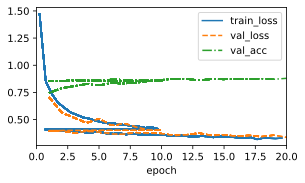

In [32]:
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

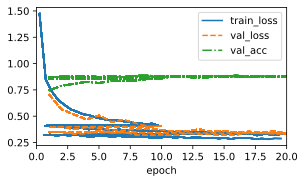

In [33]:
trainer.fit(model, data)

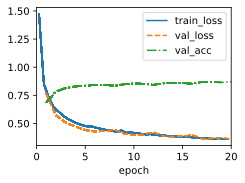

In [34]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model_ = DropoutMLP(**hparams)
data_ = d2l.FashionMNIST(batch_size=256)
trainer_ = d2l.Trainer(max_epochs=20)
trainer_.fit(model_, data_)

In [35]:
#Predicting House Prices on Kaggle
%matplotlib inline
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [36]:
def download(url, folder, sha1_hash=None):
    """Download a file to folder and return the local filepath."""

def extract(filename, folder):
    """Extract a zip/tar file into folder."""

In [37]:
class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

In [38]:
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape)
print(data.raw_val.shape)

(1460, 81)
(1459, 80)


In [39]:
print(data.raw_train.iloc[:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [40]:
print(data.raw_train.iloc[:4, ])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml  

In [41]:
@d2l.add_to_class(KaggleHouse)
def preprocess(self):
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes!='object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    
    # Replace NAN numerical features by 0 #should this before the Standardize numerical columns?
    features[numeric_features] = features[numeric_features].fillna(0)
    
    # Replace discrete features by one-hot encoding
    features = pd.get_dummies(features, dummy_na=True)
    
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

In [42]:
data.preprocess()
data.train.shape, data.val.shape

((1460, 331), (1459, 330))

In [43]:
label = 'SalePrice'
features = pd.concat(
        (data.raw_train.drop(columns=['Id', label]),
         data.raw_val.drop(columns=['Id'])))

In [44]:
features.shape

(2919, 79)

In [45]:
print(features.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object


In [46]:
numeric_features = features.dtypes[features.dtypes!='object'].index

In [47]:
print(numeric_features)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [48]:
print(numeric_features.shape)

(36,)


In [49]:
features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))

In [50]:
print(features)

      MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0       0.067320       RL    -0.184443 -0.217841   Pave   NaN      Reg   
1      -0.873466       RL     0.458096 -0.072032   Pave   NaN      Reg   
2       0.067320       RL    -0.055935  0.137173   Pave   NaN      IR1   
3       0.302516       RL    -0.398622 -0.078371   Pave   NaN      IR1   
4       0.067320       RL     0.629439  0.518814   Pave   NaN      IR1   
...          ...      ...          ...       ...    ...   ...      ...   
1454    2.419286       RM    -2.069222 -1.043758   Pave   NaN      Reg   
1455    2.419286       RM    -2.069222 -1.049083   Pave   NaN      Reg   
1456   -0.873466       RL     3.884968  1.246594   Pave   NaN      Reg   
1457    0.655311       RL    -0.312950  0.034599   Pave   NaN      Reg   
1458    0.067320       RL     0.201080 -0.068608   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch  PoolArea PoolQC  Fence  \
0            Lvl    AllPub    

In [51]:
features[numeric_features] = features[numeric_features].fillna(0)

In [52]:
print(features)

      MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0       0.067320       RL    -0.184443 -0.217841   Pave   NaN      Reg   
1      -0.873466       RL     0.458096 -0.072032   Pave   NaN      Reg   
2       0.067320       RL    -0.055935  0.137173   Pave   NaN      IR1   
3       0.302516       RL    -0.398622 -0.078371   Pave   NaN      IR1   
4       0.067320       RL     0.629439  0.518814   Pave   NaN      IR1   
...          ...      ...          ...       ...    ...   ...      ...   
1454    2.419286       RM    -2.069222 -1.043758   Pave   NaN      Reg   
1455    2.419286       RM    -2.069222 -1.049083   Pave   NaN      Reg   
1456   -0.873466       RL     3.884968  1.246594   Pave   NaN      Reg   
1457    0.655311       RL    -0.312950  0.034599   Pave   NaN      Reg   
1458    0.067320       RL     0.201080 -0.068608   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch  PoolArea PoolQC  Fence  \
0            Lvl    AllPub    

In [53]:
features = pd.get_dummies(features, dummy_na=True)

In [54]:
print(features)

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.067320    -0.184443 -0.217841     0.646073    -0.507197   1.046078   
1      -0.873466     0.458096 -0.072032    -0.063174     2.187904   0.154737   
2       0.067320    -0.055935  0.137173     0.646073    -0.507197   0.980053   
3       0.302516    -0.398622 -0.078371     0.646073    -0.507197  -1.859033   
4       0.067320     0.629439  0.518814     1.355319    -0.507197   0.947040   
...          ...          ...       ...          ...          ...        ...   
1454    2.419286    -2.069222 -1.043758    -1.481667     1.289537  -0.043338   
1455    2.419286    -2.069222 -1.049083    -1.481667    -0.507197  -0.043338   
1456   -0.873466     3.884968  1.246594    -0.772420     1.289537  -0.373465   
1457    0.655311    -0.312950  0.034599    -0.772420    -0.507197   0.682939   
1458    0.067320     0.201080 -0.068608     0.646073    -0.507197   0.715952   

      YearRemodAdd  MasVnrArea  BsmtFin

In [55]:
@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: torch.tensor(x.values.astype(float),
                                      dtype=torch.float32)
    #print("get_dataloader get_tensor", get_tensor)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
    #print(help(tensors))
    #print("get_dataloader tensors", tensors)
    return self.get_tensorloader(tensors, train)

In [56]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    #print("k_fold_data", rets)
    return rets

In [57]:
def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        #print("k_fold", i, data_fold)
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

C:\Users\drhu0\miniconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
C:\Users\drhu0\miniconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
C:\Users\drhu0\miniconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
C:\Users\drhu0\miniconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to t

average validation log mse = 0.18892702758312224


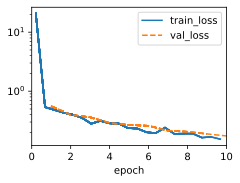

In [58]:
trainer = d2l.Trainer(max_epochs=10)
models = k_fold(trainer, data, k=5, lr=0.01)

In [59]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32))
         for model in models]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('submission.csv', index=False)

In [60]:
models

[LinearRegression(
   (net): Linear(in_features=330, out_features=1, bias=True)
 ),
 LinearRegression(
   (net): Linear(in_features=330, out_features=1, bias=True)
 ),
 LinearRegression(
   (net): Linear(in_features=330, out_features=1, bias=True)
 ),
 LinearRegression(
   (net): Linear(in_features=330, out_features=1, bias=True)
 ),
 LinearRegression(
   (net): Linear(in_features=330, out_features=1, bias=True)
 )]

In [61]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32))
         for model in models]
print(len(preds))
print(preds[0].shape)
print(preds[0][:5])
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)
print(ensemble_preds.shape)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('submission2.csv', index=False)

5
torch.Size([1459, 1])
tensor([[11.5356],
        [13.4559],
        [12.1698],
        [12.4943],
        [12.1909]], grad_fn=<SliceBackward0>)
torch.Size([1459])


In [62]:
#Visiting following sites
https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
https://github.com/search?q=repo%3Apytorch%2Fpytorch%20Dropout&type=issues

TensorFlow Extended (TFX) is an end-to-end platform for deploying production ML pipelines.
https://www.tensorflow.org/tfx

https://zhuanlan.zhihu.com/p/454829778   李沐深度学习——Kaggle房价预测比赛
https://www.kaggle.com/ 
https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises
I can't reproduce it as the video says

https://www.kaggle.com/c/california-house-prices/overview

SyntaxError: invalid decimal literal (718395200.py, line 3)